# ME 581

## HW 3

In [45]:
import numpy as np # numerical library
import matplotlib.pyplot as plt # plotting library
%config InlineBackend.figure_format='retina' # high-res plots
import control.matlab as ctm # matlab layer for control systems library
import control as ct # use regular control library for a few things 
ct.set_defaults('statesp', latex_repr_type='separate')

## 1a.

In [46]:
v0 = 25
Ka = 1599
tau_a = 0.5
M = 1670
B0 = 27.8
g = 9.8
Kp = 0.6
KI = 0.01
KD = 0.08


In [47]:
CPI = ctm.tf2ss([Kp, KI], [1, 0], inputs = 'e', outputs = 'u')
CKa = ctm.tf2ss(Ka, [tau_a, 1], inputs = 'ubar', outputs = 'ft')
CM = ctm.tf2ss(1, M, inputs = 'f', outputs = 'a')
Cs = ctm.tf2ss(1, [1, 0], inputs = 'a', outputs = 'v')
CB = ctm.tf2ss(B0, 1, inputs = 'v', outputs = 'b')
CKd = ctm.tf2ss(KD, 1, inputs = 'a', outputs = 'd')
sum1 = ct.summing_junction(['vref', '-v'], 'e')
sum2 = ct.summing_junction(['u', '-d'], 'ubar')
sum3 = ct.summing_junction(['ft', 'fd', '-b'], 'f')
sys = ct.interconnect([CPI, CKa, CM, Cs, CB, CKd, sum1, sum2, sum3], inplist = ['vref', 'fd'], outlist = ['v', 'ubar'])
display(sys)


<LinearICSystem:ubar:['u[0]', 'u[1]']->['y[0]', 'y[1]']>

## 1b.

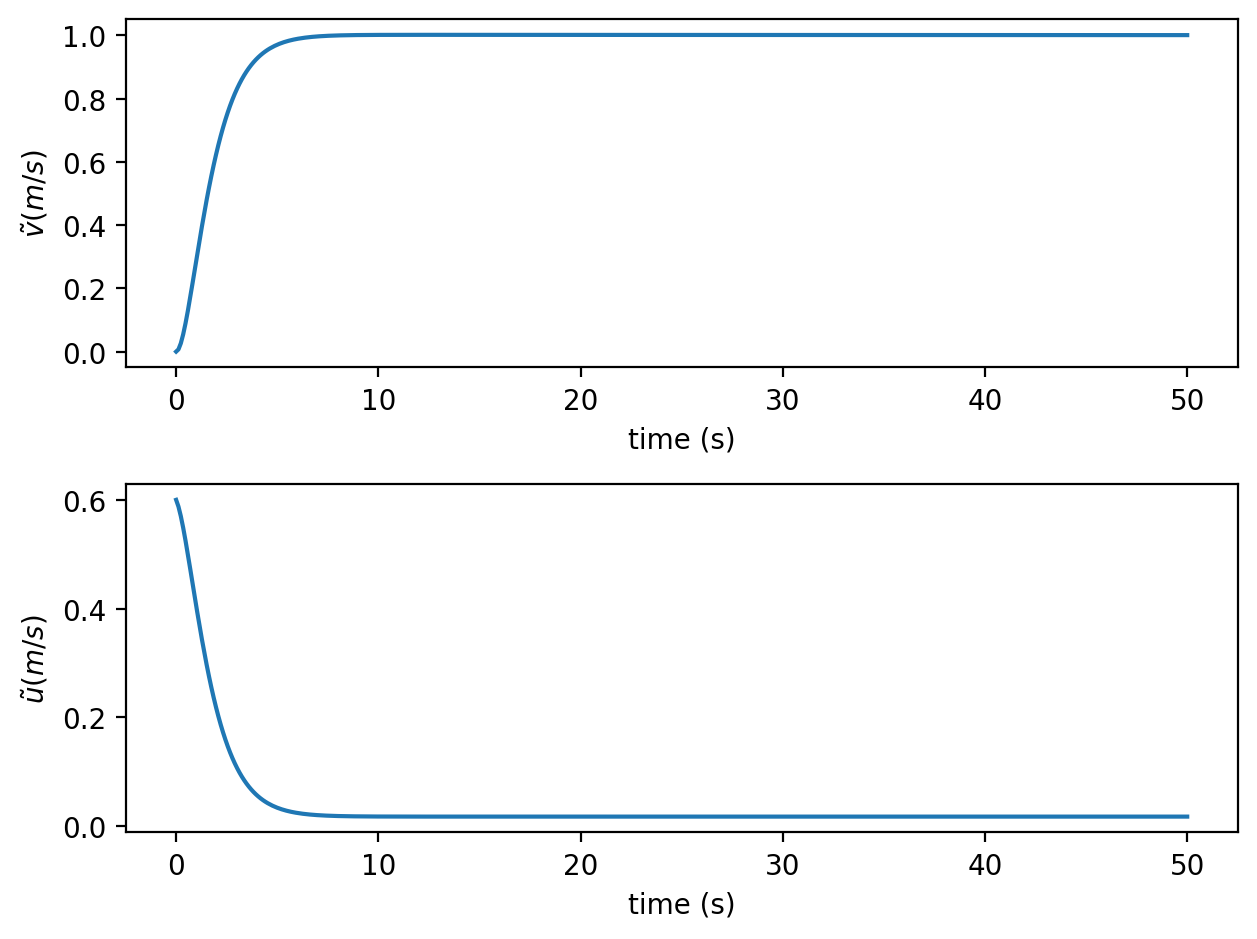

In [63]:
sys_v = sys[0, 0]
sys_u = sys[1, 0]
yv, tv = ctm.step(sys_v, 50)
yu, tu = ctm.step(sys_u, 50)

plt.subplot(2, 1, 1)
plt.plot(tv, yv)
plt.xlabel('time (s)')
plt.ylabel(r'$\tilde{v} (m/s)$')
plt.subplot(2, 1, 2)
plt.plot(tu, yu)
plt.xlabel('time (s)')
plt.ylabel(r'$\tilde{u} (m/s)$')
plt.tight_layout()

## 1c.

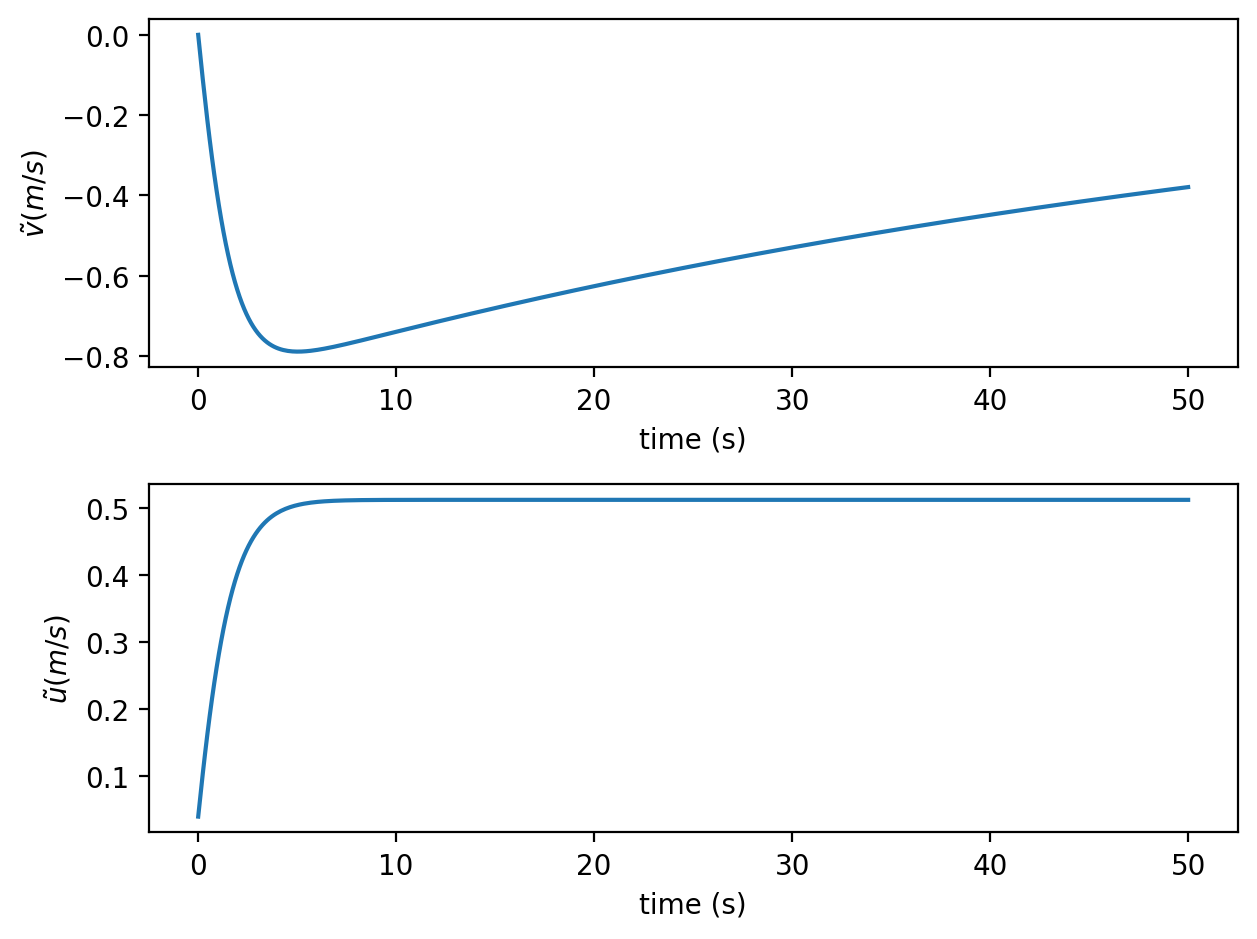

In [64]:
scale = - M * g * np.sin(0.05)
sys_v = sys[0, 1]
sys_u = sys[1, 1]
yv, tv = ctm.step(sys_v, 50)
yu, tu = ctm.step(sys_u, 50)

plt.subplot(2, 1, 1)
plt.plot(tv, scale * yv)
plt.xlabel('time (s)')
plt.ylabel(r'$\tilde{v} (m/s)$')
plt.subplot(2, 1, 2)
plt.plot(tu, scale * yu)
plt.xlabel('time (s)')
plt.ylabel(r'$\tilde{u} (m/s)$')
plt.tight_layout()